In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!ls nyiso_load_1hr/20170101palIntegrated_csv/

20170101palIntegrated.csv 20170112palIntegrated.csv 20170123palIntegrated.csv
20170102palIntegrated.csv 20170113palIntegrated.csv 20170124palIntegrated.csv
20170103palIntegrated.csv 20170114palIntegrated.csv 20170125palIntegrated.csv
20170104palIntegrated.csv 20170115palIntegrated.csv 20170126palIntegrated.csv
20170105palIntegrated.csv 20170116palIntegrated.csv 20170127palIntegrated.csv
20170106palIntegrated.csv 20170117palIntegrated.csv 20170128palIntegrated.csv
20170107palIntegrated.csv 20170118palIntegrated.csv 20170129palIntegrated.csv
20170108palIntegrated.csv 20170119palIntegrated.csv 20170130palIntegrated.csv
20170109palIntegrated.csv 20170120palIntegrated.csv 20170131palIntegrated.csv
20170110palIntegrated.csv 20170121palIntegrated.csv
20170111palIntegrated.csv 20170122palIntegrated.csv


In [5]:
df_int = pd.read_csv('nyiso_load_1hr/' + '20170101palIntegrated_csv/' + '20170101palIntegrated.csv', parse_dates = ['Time Stamp'])

In [6]:
df_int.head()

,Time Stamp,Time Zone,Name,PTID,Integrated Load
0,2017-01-01,EST,CAPITL,61757,1190.5
1,2017-01-01,EST,CENTRL,61754,1616.8
2,2017-01-01,EST,DUNWOD,61760,592.3
3,2017-01-01,EST,GENESE,61753,945.1
4,2017-01-01,EST,HUD VL,61758,964.8


In [9]:
nyc_ind = df_int.Name.apply(lambda x: 'N.Y.C.' in x)
df_nyc = df_int.loc[nyc_ind,['Time Stamp', 'Integrated Load']].reset_index(drop = True)

In [10]:
df_nyc.head()

,Time Stamp,Integrated Load
0,2017-01-01 00:00:00,5011.2
1,2017-01-01 01:00:00,4837.3
2,2017-01-01 02:00:00,4652.6
3,2017-01-01 03:00:00,4500.7
4,2017-01-01 04:00:00,4423.5


In [11]:
df_nyc.columns = ['time_stamp', 'load']

In [12]:
df_nyc.set_index('time_stamp', inplace = True)

df_nyc['time_stamp_local'] = df_nyc.index

df_nyc.set_index(df_nyc.index.tz_localize('US/Eastern'), inplace = True)

In [13]:
df_nyc.head()

,load,time_stamp_local
time_stamp,,
2017-01-01 00:00:00-05:00,5011.2,2017-01-01 00:00:00
2017-01-01 01:00:00-05:00,4837.3,2017-01-01 01:00:00
2017-01-01 02:00:00-05:00,4652.6,2017-01-01 02:00:00
2017-01-01 03:00:00-05:00,4500.7,2017-01-01 03:00:00
2017-01-01 04:00:00-05:00,4423.5,2017-01-01 04:00:00


In [14]:
df_nyc.set_index(df_nyc.index.tz_convert('GMT'), inplace = True)

In [15]:
df_nyc.head()

,load,time_stamp_local
time_stamp,,
2017-01-01 05:00:00+00:00,5011.2,2017-01-01 00:00:00
2017-01-01 06:00:00+00:00,4837.3,2017-01-01 01:00:00
2017-01-01 07:00:00+00:00,4652.6,2017-01-01 02:00:00
2017-01-01 08:00:00+00:00,4500.7,2017-01-01 03:00:00
2017-01-01 09:00:00+00:00,4423.5,2017-01-01 04:00:00


In [2]:
def is_number(s):
    try:
        float(s)
        return float(s)
    except ValueError:
        return 0.

In [3]:
def select_nyc(dir_path, filename, zone):
    df_int = pd.read_csv(dir_path + filename, parse_dates = ['Time Stamp'])#, dtype={'Integrated Load' : np.float64})
    nyc_ind = df_int.Name.apply(lambda x: zone in x)
    df_nyc = df_int.loc[nyc_ind,['Time Stamp', 'Integrated Load']].reset_index(drop = True)
    df_nyc.columns = ['time_stamp', 'load']
    df_nyc.loc[:,'load'] = df_nyc.load.apply(is_number)
    df_nyc.set_index('time_stamp', inplace = True)
    df_nyc['time_stamp_local'] = df_nyc.index
    df_nyc.set_index(df_nyc.index.tz_localize('US/Eastern', ambiguous='infer'), inplace = True)
    df_nyc.set_index(df_nyc.index.tz_convert('GMT'), inplace = True)
#     output_filename = filename[:8] + 'nyc.csv'
#     df_nyc.to_csv(dir_path + output_filename)
    return df_nyc

In [64]:
zone = 'WEST' #'WEST'#'NORTH'#'MILLWD' #'MHK VL'#'LONGIL'#'HUD VL' #'GENESE' #'DUNWOD' #'CENTRL' #'CAPITL' #'N.Y.C.'
nyiso_dir = 'nyiso_load_1hr/'
df_t = pd.DataFrame()
for dir_path in os.listdir(nyiso_dir):
    if 'csv' in dir_path:
        dir_path = nyiso_dir + dir_path + '/'
        for filename in os.listdir(dir_path):
            if 'palIntegrated' in filename:
                df_t = pd.concat([df_t, select_nyc(dir_path, filename, zone)])
                #select_nyc(dir_path, filename)

In [65]:
df_t.sort_index(inplace = True)

In [66]:
df_t.head(), df_t.tail()

(                             load    time_stamp_local
 time_stamp                                           
 2016-01-01 05:00:00+00:00  1603.3 2016-01-01 00:00:00
 2016-01-01 06:00:00+00:00  1536.0 2016-01-01 01:00:00
 2016-01-01 07:00:00+00:00  1480.4 2016-01-01 02:00:00
 2016-01-01 08:00:00+00:00  1459.6 2016-01-01 03:00:00
 2016-01-01 09:00:00+00:00  1454.8 2016-01-01 04:00:00,
                              load    time_stamp_local
 time_stamp                                           
 2018-02-01 00:00:00+00:00  2064.3 2018-01-31 19:00:00
 2018-02-01 01:00:00+00:00  2012.7 2018-01-31 20:00:00
 2018-02-01 02:00:00+00:00  1928.1 2018-01-31 21:00:00
 2018-02-01 03:00:00+00:00  1822.8 2018-01-31 22:00:00
 2018-02-01 04:00:00+00:00  1703.8 2018-01-31 23:00:00)

In [67]:
df_t.to_csv('nyiso_' + zone + '_load.csv')

In [68]:
df_t.dtypes

load                       float64
time_stamp_local    datetime64[ns]
dtype: object

In [69]:
df_t.shape

(18288, 2)

In [ ]:
# df_t.loc[:,'integrated_load'] = df_t.integrated_load.apply(is_number)

In [ ]:
#df_cmp = pd.read_csv('nyiso_2017.csv', parse_dates=['time_stamp'])

In [31]:
# fig, ax = plt.subplots(figsize = (8, 8))
# #ax.plot(df_t.loc[:,'time_stamp_local'], df_t.loc[:,'integrated_load'], '.')
# ax.plot(df_t.index, df_t.loc[:,'time_stamp_local'], '.', label = 'GMT')
# # ax.set_xlim(pd.datetime(2016,3,13), pd.datetime(2016,3,14))
# # ax.set_ylim(pd.datetime(2016,3,13), pd.datetime(2016,3,14))
# ax.set_xlim(pd.datetime(2016,11,6), pd.datetime(2016,11,7))
# ax.set_ylim(pd.datetime(2016,11,6), pd.datetime(2016,11,7))

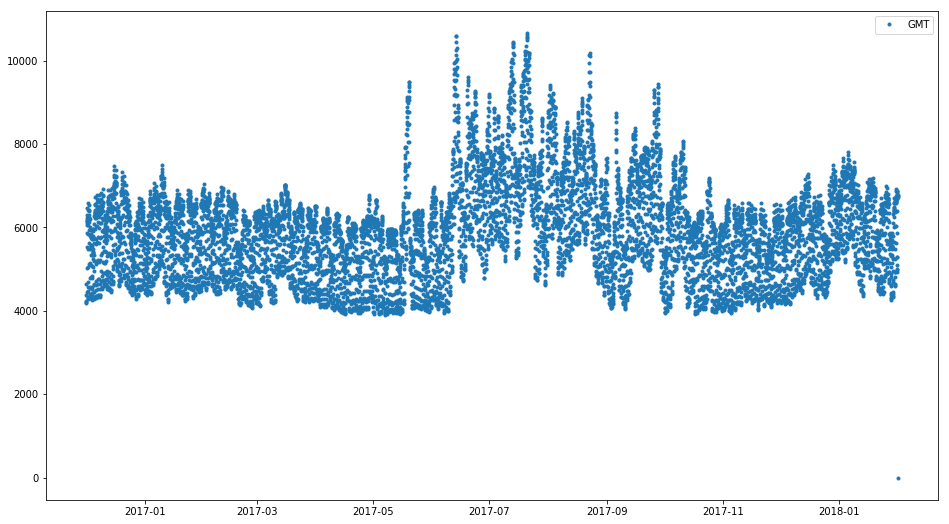

In [29]:
fig, ax = plt.subplots(figsize = (16, 9))
#ax.plot(df_t.loc[:,'time_stamp_local'], df_t.loc[:,'integrated_load'], '.')
ax.plot(df_t.index, df_t.loc[:,'load'], '.', label = 'GMT')
#ax.plot(df_cmp.iloc[:,0], df_cmp.iloc[:,1], '.', label = 'EST')
ax.legend()
#ax.set_xlim(pd.datetime(2017,3,8), pd.datetime(2017,3,15))

In [34]:
df_t.shape

(106171, 2)

In [27]:
df_t.dtypes

load                       float64
time_stamp_local    datetime64[ns]
dtype: object

In [22]:
df_t.head()

,load,time_stamp_local
time_stamp,,
2017-12-20 05:00:00+00:00,4969.7,2017-12-20 00:00:00
2017-12-20 05:05:00+00:00,4939.9,2017-12-20 00:05:00
2017-12-20 05:10:00+00:00,4903.5,2017-12-20 00:10:00
2017-12-20 05:15:00+00:00,4864.9,2017-12-20 00:15:00
2017-12-20 05:20:00+00:00,4844.5,2017-12-20 00:20:00


In [23]:
df_t.sort_index(inplace = True)

In [24]:
df_t.head()

,load,time_stamp_local
time_stamp,,
2017-01-01 05:00:00+00:00,5116.9,2017-01-01 00:00:00
2017-01-01 05:05:00+00:00,5102.1,2017-01-01 00:05:00
2017-01-01 05:10:00+00:00,5074.9,2017-01-01 00:10:00
2017-01-01 05:15:00+00:00,5089.6,2017-01-01 00:15:00
2017-01-01 05:20:00+00:00,5061.3,2017-01-01 00:20:00


In [25]:
df_t.tail()

,load,time_stamp_local
time_stamp,,
2018-01-25 18:40:00+00:00,6771.2,2018-01-25 13:40:00
2018-01-25 18:45:00+00:00,6769.0,2018-01-25 13:45:00
2018-01-25 18:50:00+00:00,6752.4,2018-01-25 13:50:00
2018-01-25 18:55:00+00:00,NaN,2018-01-25 13:55:00
2018-01-25 19:00:00+00:00,NaN,2018-01-25 14:00:00


In [35]:
df_t.dropna(inplace=True)

In [36]:
df_t.shape

(106168, 2)

In [37]:
df_t.to_csv('nyiso_load_2017.csv')

In [ ]:
df_test = pd.read_csv('nyiso_2017.csv', parse_dates=['time_stamp', 'time_stamp_local'])

In [ ]:
df_test.head()

In [ ]:
df_test.time_stamp.dtype

In [ ]:
df_test.sort_values(['time_stamp'], inplace = True)

In [ ]:
df_test.head()

In [ ]:
df_test.to_csv('nyiso_2017.csv', index = False)